In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataPreprocessingGraded_dataset.csv")
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


##Q1
How many samples are there in this dataset?
How many input features are there in this dataset?

In [ ]:
data.shape

(748, 6)

##Q2
What type of problem is this?
[Hint: look at the target variable.]

Regression

Classification

Clustering

Association rule finding

In [ ]:

data["Target"].nunique()
data["Target"].value_counts()

#its a classification problem

NO     570
YES    178
Name: Target, dtype: int64

## Q3
Which of the features has least variance?

[Hint: Ignore/remove missing values if any. Are there any categorical features?]

V1

V3

V4

V2

In [ ]:
#creating a copy of the data
data_copy= data.copy()

#checking null values
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [ ]:
#replacing special values with Null values,
data_copy.replace("?", np.nan, inplace=True)
data_copy.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
#dropping the null values
data_copy=data_copy.dropna()
data_copy[["V1","V2"]] = data_copy[["V1","V2"]].astype(float)
data_copy

<ipython-input-13-37b4597d788a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy[["V1","V2"]] = data_copy[["V1","V2"]].astype(float)


,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
8,2.0,9.0,2250.0,22.0,NEGATIVE,YES
9,5.0,46.0,11500.0,98.0,NEGATIVE,YES
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [ ]:
#splitting the dataset
labels = data_copy["Target"]
features = data_copy.drop(columns=["Target"])


In [ ]:
#first two features were object type need to do typecasting to find the variance

variance = features.var()

# Convert to human readable format
variance.apply(lambda x: format(x, '.2f'))




<ipython-input-15-28480aded2c0>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = features.var()


V1         65.62
V2         33.37
V3    2085440.11
V4        596.96
dtype: object

##Q4
Which of the following features has least number of outliers?
[Hint: Which visualization marks outliers? Ignore/remove missing values if any]

V1

V2

V3

{'whiskers': [<matplotlib.lines.Line2D object at 0x791abe222290>, <matplotlib.lines.Line2D object at 0x791abe2214b0>], 'caps': [<matplotlib.lines.Line2D object at 0x791abe223640>, <matplotlib.lines.Line2D object at 0x791abe222d40>], 'boxes': [<matplotlib.lines.Line2D object at 0x791abe223070>], 'medians': [<matplotlib.lines.Line2D object at 0x791abe2227d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x791abe221a20>], 'means': []}


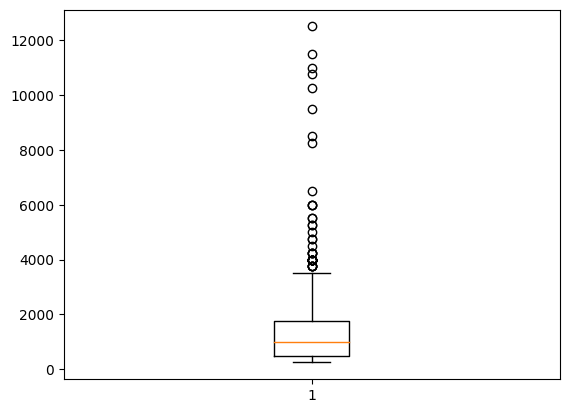

In [ ]:
# print(plt.boxplot(features["V1"]))
# print(plt.boxplot(features["V2"]))
print(plt.boxplot(features["V3"]))


<ipython-input-16-c2afc1f83d58>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(columns), i+1)


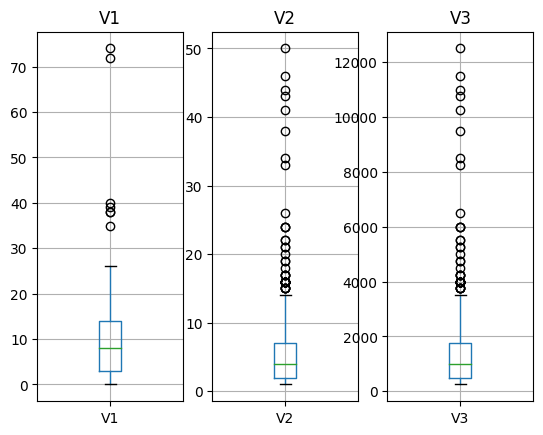

In [ ]:



# Assuming df is your DataFrame
fig, ax = plt.subplots()

# List of columns to inspect
columns = ['V1', 'V2', 'V3']

for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    features.boxplot(column=col)
    plt.title(col)

plt.show()


**V1** is your answer

##Q5
Which of the following is true about target variable?

It has higher 'YES' entries than 'NO' entries.

It has higher 'NO' entries than 'YES' entries.

It has same number of entries of 'YES' and 'NO'

In [ ]:
print(data["Target"].value_counts())

NO     570
YES    178
Name: Target, dtype: int64


## Q6
How many features have missing values in the dataset?

[Hint: missing values are marked by '?']

1

2

3

4

In [ ]:
a= data.loc[data["V1"]=="?", "V1"].count()
b= data.loc[data["V2"]=="?", "V2"].count()
c=data.loc[data["V4"]=="?", "V4"].count()
d=data.loc[data["V5"]=="?", "V5"].count()
print(a,b,c,d)

5 5 0 0


##Q7
What is total number of missing values in the dataset?

12

13

10

11

In [ ]:
a= data.loc[data["V1"]=="?", "V1"].count()
b= data.loc[data["V2"]=="?", "V2"].count()
c=data.loc[data["V4"]=="?", "V4"].count()
d=data.loc[data["V5"]=="?", "V5"].count()

print(a,b,c,d)

5 5 0 0


##Q8
What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?

In [ ]:
# i am working with data that has null values as Nan but they aren't dropped here, this copy of is now divided into data_featues and data_labels
data.replace("?", np.nan)
data.head()


,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
# Assuming `df` is your DataFrame and `label_column` is the name of your label column
data_labels = data["Target"]
data_features = data.drop(columns=["Target"])



In [ ]:
from sklearn.impute import SimpleImputer
transform= SimpleImputer(missing_values=np.nan,strategy="median")
x = np.array(data_features["V1"]).reshape(-1,1)
transform= transform.fit_transform(x)


transform.shape





(748, 1)

In [ ]:
mean=np.mean(transform)
mean


9.552139037433156

##Q9
What is average of first column after applyting KNNImputer(n_neighbors = 3)?

In [ ]:
from sklearn.impute import KNNImputer
knnimputed= KNNImputer(missing_values=np.nan,n_neighbors=3)
y = np.array(data_features["V1"]).reshape(-1,1)
knnimputed= knnimputed.fit_transform(y)

print(knnimputed.shape)
print(np.mean(knnimputed))

(748, 1)
9.562584118438762


##Q10
What is average of second feature (i.e. 'V2') after applyting SimpleImputer(strategy = 'mean')?

In [ ]:
from sklearn.impute import SimpleImputer
imputed= SimpleImputer(missing_values=np.nan,strategy="mean")
x = np.array(data_features["V2"]).reshape(-1,1)
imputed= imputed.fit_transform(x)
imputed.shape


(748, 1)

In [ ]:
mean2= np.mean(imputed)
mean2

5.464333781965007

##Q11
How many features remain after applying following pipeline to the feature matrix?

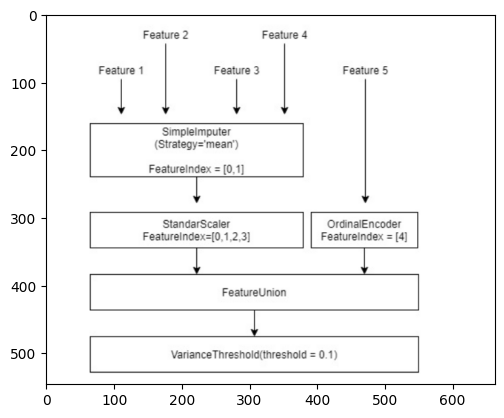

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/1.png')
plt.imshow(img)
plt.show()


In [ ]:
features.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE
8,2.0,9.0,2250.0,22.0,NEGATIVE
9,5.0,46.0,11500.0,98.0,NEGATIVE


In [ ]:
labels.head()

0    YES
1    YES
4     NO
8    YES
9    YES
Name: Target, dtype: object

##Q12


`Pipeline` and `FeatureUnion` are both classes in scikit-learn that are used for combining transformers, but they serve different purposes:

1. **Pipeline**: A `Pipeline` sequentially applies a list of transforms and a final estimator¹². Intermediate steps of the pipeline must be 'transforms', i.e., they must implement `fit` and `transform` methods¹². The final estimator only needs to implement `fit`¹². The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters¹².

2. **FeatureUnion**: A `FeatureUnion` concatenates the results of multiple transformer objects¹. It applies a list of transformer objects in parallel to the input data, then concatenates the results¹. This is useful to combine several feature extraction mechanisms or transformations into a single transformer¹.

In other words, `Pipeline` is used for defining a sequence of transformations, while `FeatureUnion` is used for combining several transformers (or pipelines) that are applied to the data in parallel¹².


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold

# Define the transformers for each type of feature
simple_imputer = SimpleImputer(strategy='mean')
standard_scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder()

# Create the pipelines
scale_pipe = Pipeline(steps=[
    ('impute', simple_imputer),
    ('scale', standard_scaler)
])

categorical_pipe = Pipeline(steps=[
    ('cat', ordinal_encoder)
])

# Create the column transformers
numeric_transformer = ColumnTransformer(transformers=[
    ('num', scale_pipe, [0,1,2,3])
])

categorical_transformer = ColumnTransformer(transformers=[
    ('cat', categorical_pipe, [4])
])

# Create the feature union
complete_pipe = FeatureUnion([
    ('numeric', numeric_transformer),
    ('cat', categorical_transformer)
])

# Create the final pipeline
pipe = Pipeline(steps=[
    ('cp', complete_pipe),
    ('varianceThreshold', VarianceThreshold(threshold=0.1))
])

# Fit and transform the data
X_transformed = pipe.fit_transform(X)
X_transformed.shape

(748, 4)

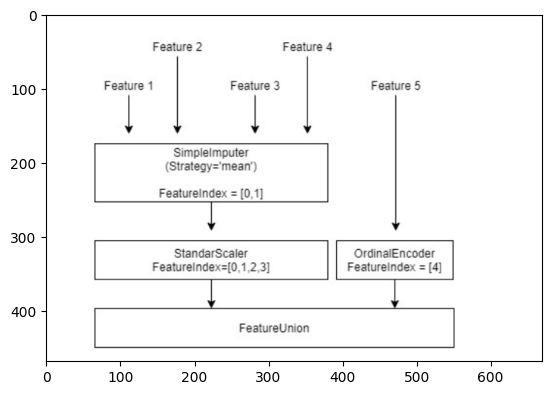

In [ ]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/2.png')
plt.imshow(img)
plt.show()

    Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.


(A) What are the two most important features computed by RFE?


(B) What are the indices of two most important features computed by SFS (forward)?


(c)What are the indices of two most important features computed by SFS (backward)?

